In [1]:
# We will be working with the IRIS dataset (part of sample datasets in scikitlearn)
# We will classify flowers types with different classifiers 
# Here it would be KNNClassifier

import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_names = iris.target_names

# print(X[40:60])
# print(y[40:60])
# print(y_names)


In [3]:
from sklearn.model_selection import train_test_split

# use train_test_split to split the data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)


(105, 4)
(45, 4)


In [4]:
# KNN Classifier applied to classify the flowers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KNNCL = KNeighborsClassifier(n_neighbors=3)
KNNCL.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(KNNCL.score(X_train, y_train)))
print("Testing Score: {}".format(KNNCL.score(X_test, y_test)))


Training Score: 0.9714285714285714
Testing Score: 0.9111111111111111


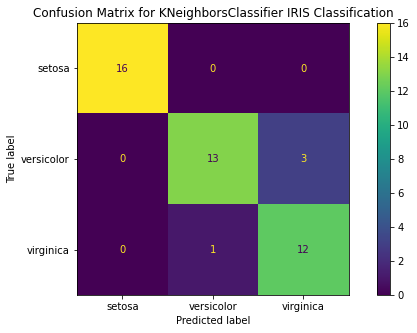

In [19]:
# plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = KNNCL.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(y_names)
ax.yaxis.set_ticklabels(y_names)
_ = ax.set_title(
    f"Confusion Matrix for {KNNCL.__class__.__name__} IRIS Classification"
)

In [20]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    KNNCLk = KNeighborsClassifier(n_neighbors=k)
    scorescv = cross_val_score(KNNCLk, X_train, y_train,cv=5)
    print("{} accuracy with a standard deviation of {}".format(scorescv.mean(), scorescv.std()))
    scores.append(scorescv.mean())

# print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.9523809523809523 accuracy with a standard deviation of 0.04259177099999599
0.9428571428571428 accuracy with a standard deviation of 0.03563483225498991
0.9714285714285713 accuracy with a standard deviation of 0.023328473740792197
0.9714285714285713 accuracy with a standard deviation of 0.023328473740792197
0.9619047619047618 accuracy with a standard deviation of 0.03563483225498992
0.9523809523809523 accuracy with a standard deviation of 0.06023386019368343
0.9619047619047618 accuracy with a standard deviation of 0.03563483225498992
0.9714285714285713 accuracy with a standard deviation of 0.0380952380952381
0.9619047619047618 accuracy with a standard deviation of 0.03563483225498992
0.9714285714285713 accuracy with a standard deviation of 0.0380952380952381
0.9619047619047618 accuracy with a standard deviation of 0.03563483225498992
0.9523809523809523 accuracy with a standard deviation of 0.030116930096841705
0.9523809523809523 accuracy with a standard deviation of 0.0425917709999959

Text(0, 0.5, 'Accuracy Score')

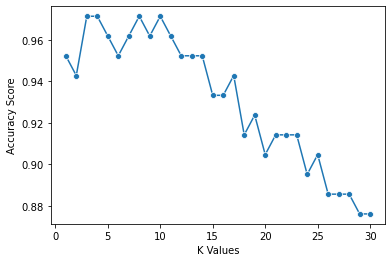

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [26]:
kopt = k_values[np.argmax(scores)]

print("Optimal k ={} ".format(kopt))

Optimal k =3 


In [28]:

KNNCL = KNeighborsClassifier(n_neighbors=kopt)
KNNCL.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred_tr = KNNCL.predict(X_train)
y_pred_test = KNNCL.predict(X_test)



print(classification_report(y_pred_tr, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.94      0.96        35
           2       0.95      0.97      0.96        36

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      0.93      0.87        14
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

